In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

In [7]:
df=pd.read_csv(r"C:\Users\Ma199\OneDrive\BIA CAPSTONE PROJECT\bank-full.csv")

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    """
    Remove outliers from the specified columns in a DataFrame using the IQR method.
    
    Parameters:
    - df (DataFrame): Input DataFrame
    - columns (list): List of column names to check for outliers
    
    Returns:
    - DataFrame: DataFrame with outliers removed
    """
    df_cleaned = df.copy()
    
    for column in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the IQR (interquartile range)
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the column
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Specify the columns to check for outliers
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Remove outliers using the IQR method
df_cleaned = remove_outliers_iqr(df, numeric_columns)

# Print the shape of the cleaned DataFrame
print("Shape after removing outliers:", df_cleaned.shape)


Shape after removing outliers: (28193, 17)


In [11]:
 df_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

C:\Users\Ma199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

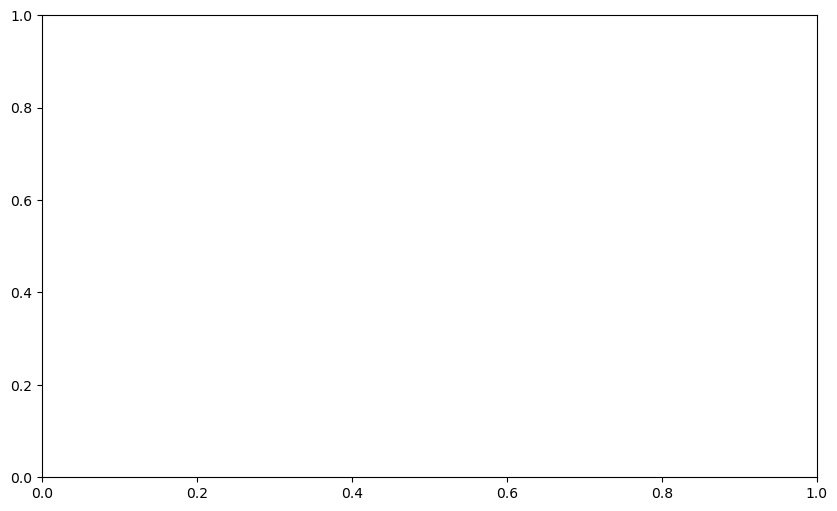

In [4]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['y'], df['age'])
plt.title('KDE Plot: y vs age ')
plt.xlabel('y')
plt.ylabel('age')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  object 
dtypes: float64(9), int64(7), object(1)
memory usage: 5.9+ MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  object 
dtypes: float64(9), int64(7), object(1)
memory usage: 5.9+ MB


In [13]:
df['duration'].isna().sum()

0

In [74]:
df['job'].value_counts()

1.0     9732
4.0     9458
9.0     7597
0.0     5171
7.0     4154
5.0     2264
6.0     1579
2.0     1487
10.0    1303
3.0     1240
8.0      938
11.0     288
Name: job, dtype: int64

In [13]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000


In [14]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000


In [15]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460


In [16]:
df1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460


In [17]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df['age'].unique()


array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [20]:
df1['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [21]:
df['job'].unique()


array([ 4.,  9.,  2.,  1., 11.,  5.,  0.,  7.,  6., 10.,  3.,  8.])

In [22]:
print(df['job'].size)

45211


In [23]:
df['marital'].unique()

array([1., 2., 0.])

In [10]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [11]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [24]:
print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [25]:
columns_to_check = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

for column in columns_to_check:
    print(df[column].value_counts())


32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
1.0     9732
4.0     9458
9.0     7597
0.0     5171
7.0     4154
5.0     2264
6.0     1579
2.0     1487
10.0    1303
3.0     1240
8.0      938
11.0     288
Name: job, dtype: int64
1.0    27214
2.0    12790
0.0     5207
Name: marital, dtype: int64
1.0    23202
2.0    13301
0.0     6851
3.0     1857
Name: education, dtype: int64
0.0    44396
1.0      815
Name: default, dtype: int64
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
1.0    25130
0.0    20081
Name: housing, dtype: int64
0.0    37967
1.0     7244
Name: loan, dtype: int64
0.0    29285
2.0    13020
1.0     2906
Name: contact, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8   

C:\Users\Ma199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

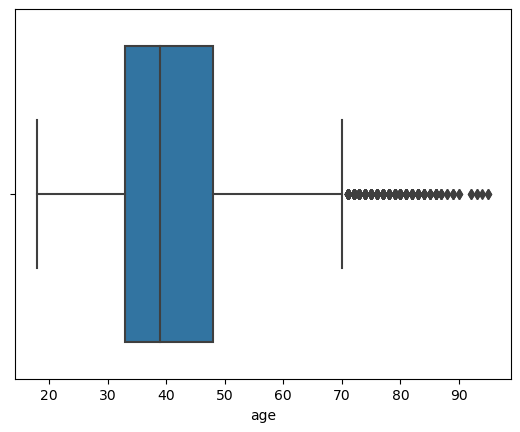

In [26]:
sns.boxplot('age',data=df)

In [52]:
df1['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

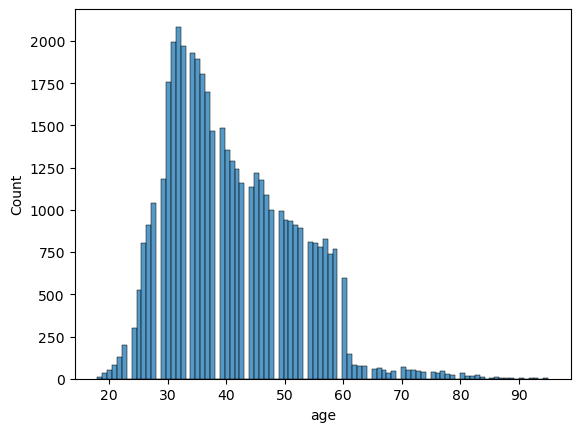

In [27]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

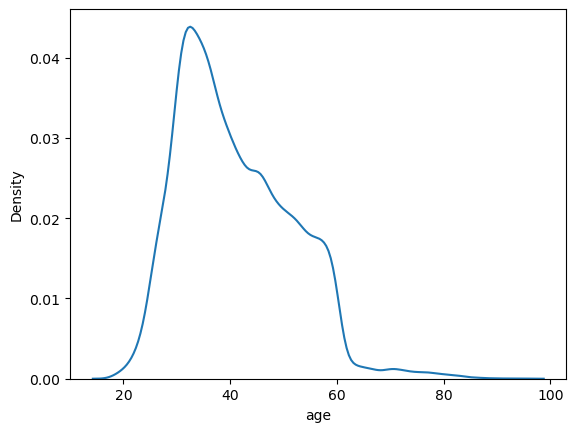

In [28]:
sns.kdeplot(df['age'])

<AxesSubplot:xlabel='balance', ylabel='Count'>

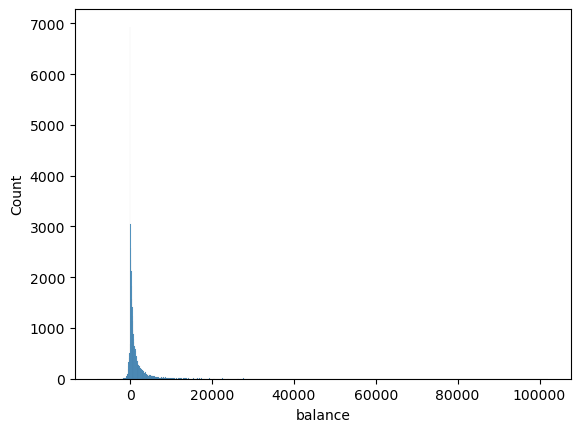

In [30]:
sns.histplot(df1['balance'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

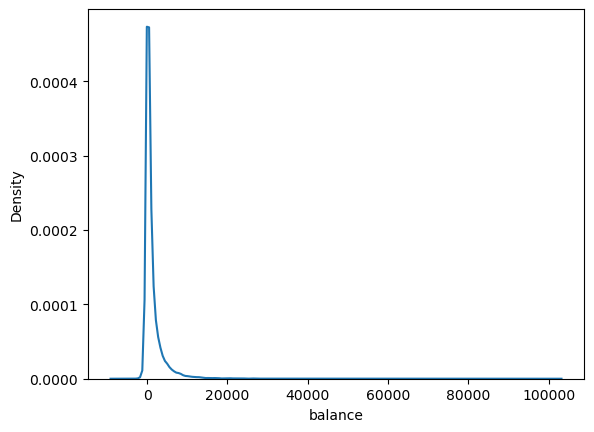

In [31]:
sns.kdeplot(df1['balance'])

C:\Users\Ma199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

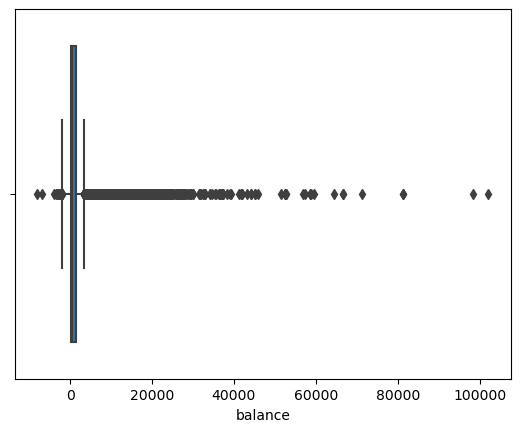

In [32]:
 sns.boxplot('balance',data=df1)

In [33]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

C:\Users\Ma199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan'>

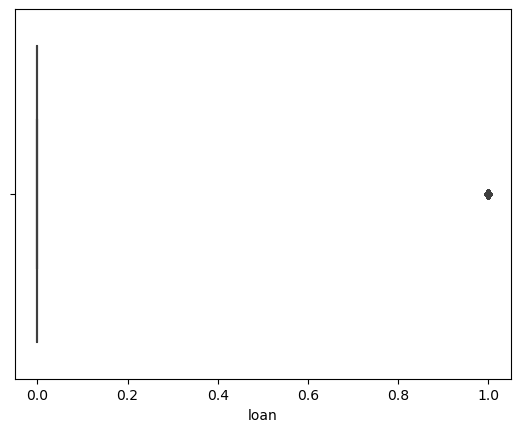

In [34]:
sns.boxplot('loan',data=df1)

<AxesSubplot:xlabel='loan', ylabel='Count'>

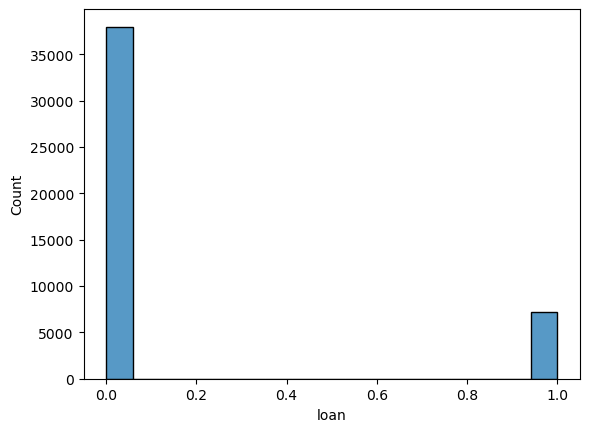

In [35]:
sns.histplot(df1['loan'])

<AxesSubplot:xlabel='loan', ylabel='Density'>

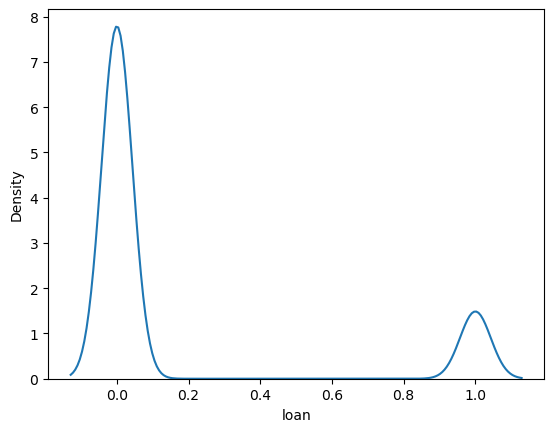

In [36]:
sns.kdeplot(df1['loan'])

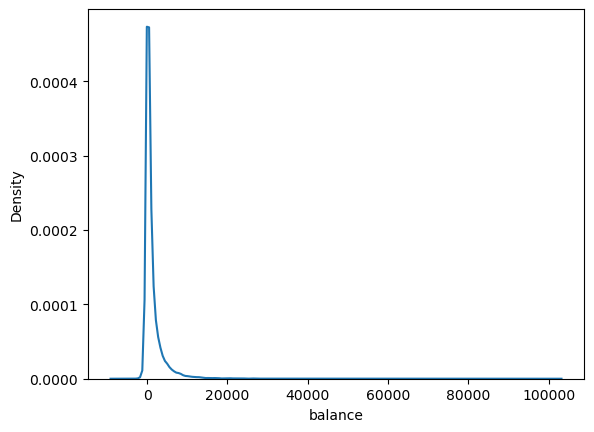

In [37]:
sns.kdeplot('balance',data=df1)  # Replace 'column_name' with the actual column name

# Display the plot
plt.show()

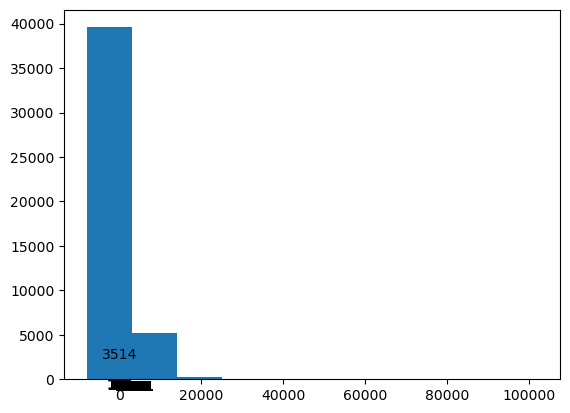

In [38]:
plt.hist('balance',data=df1)
# Get the counts for each category
value_counts = df1['balance'].value_counts()

# Add data labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='top')
    
plt.show()

<AxesSubplot:xlabel='pdays', ylabel='Density'>

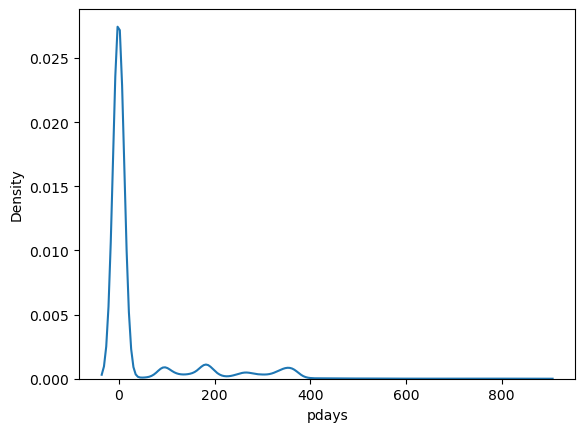

In [39]:
sns.kdeplot('pdays',data=df1)

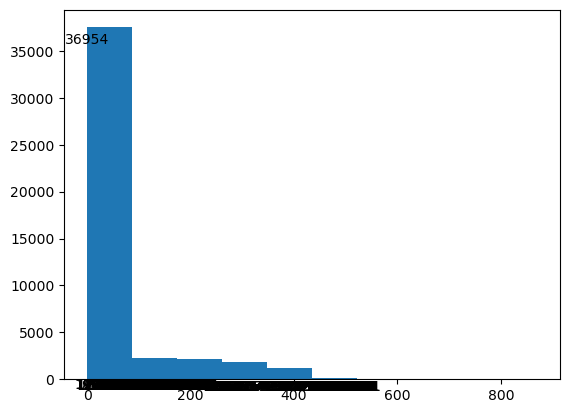

In [40]:
plt.hist('pdays',data=df1)
# Get the counts for each category
value_counts = df1['pdays'].value_counts()

# Add data labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='top')
    
plt.show()

In [ ]:
df1.columns

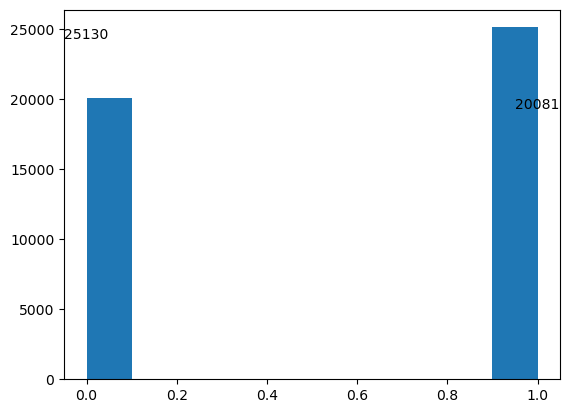

In [41]:
# Assuming df1 is a DataFrame with a column named 'housing'

# Create the histogram
plt.hist('housing', data=df1)

# Get the counts for each category
value_counts = df1['housing'].value_counts()

# Add data labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='top')

# Display the plot
plt.show()


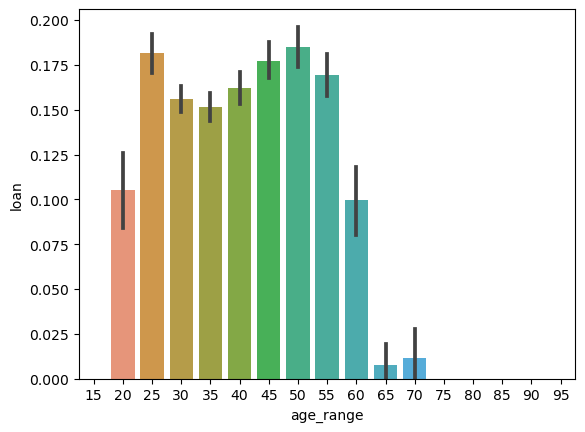

In [43]:
import seaborn as sns

# Assuming df1 is a DataFrame with columns 'age' and 'loan'

# Create a new column for age range
df1['age_range'] = (df1['age'] // 5) * 5

# Create the bar plot
sns.barplot(x='age_range', y='loan', data=df1)

# Display the plot
plt.show()


C:\Users\Ma199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

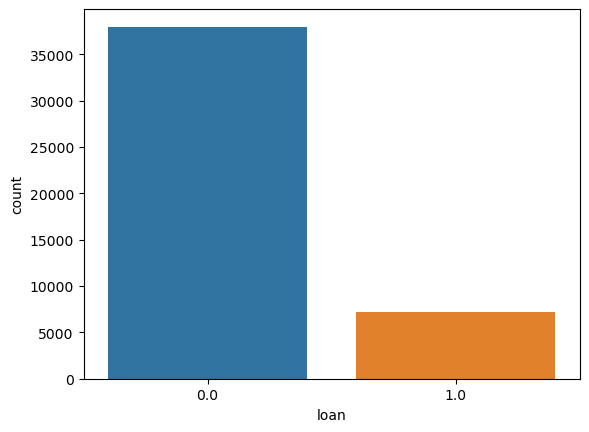

In [45]:
sns.countplot('loan',data=df1)

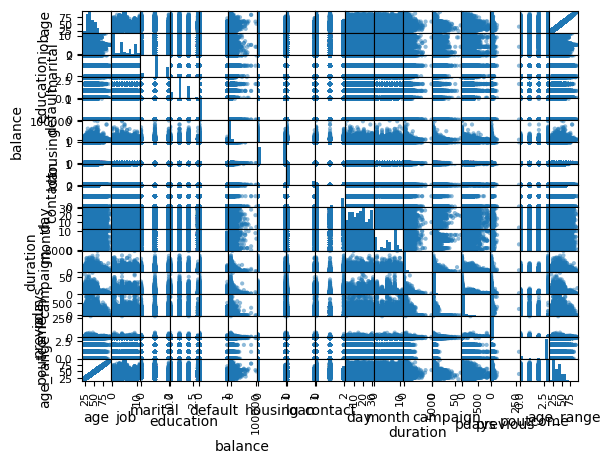

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is a DataFrame

# Create the scatter matrix plot
pd.plotting.scatter_matrix(df1)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

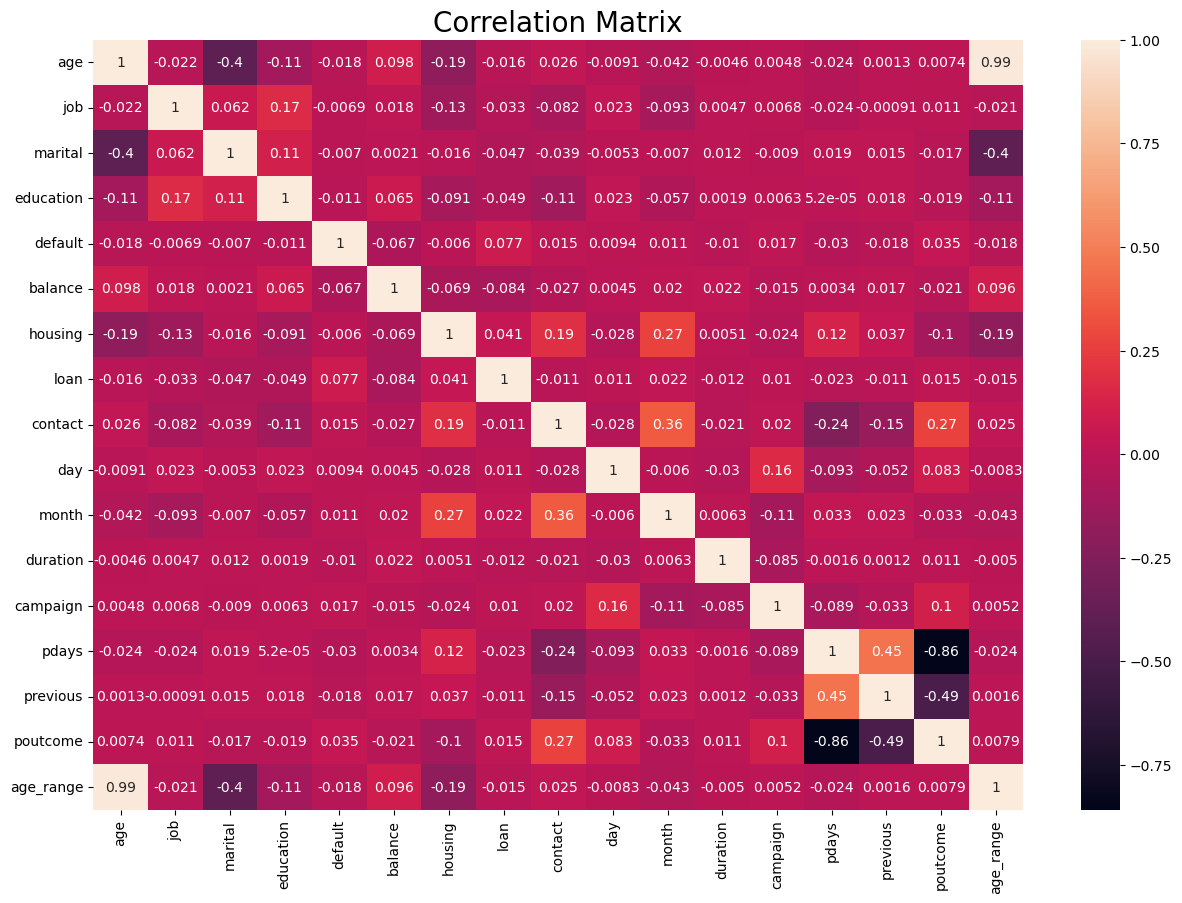

In [55]:
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20)

<AxesSubplot:xlabel='loan', ylabel='age'>

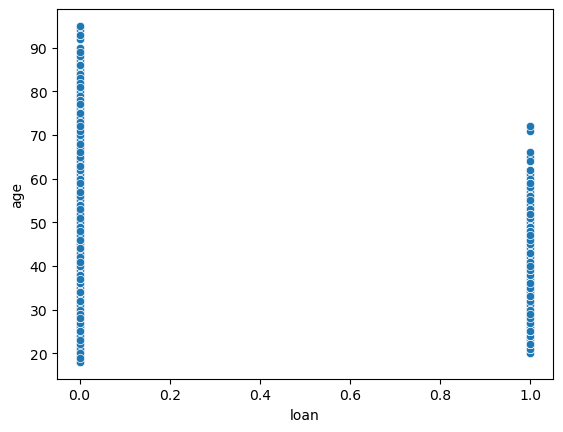

In [60]:
sns.scatterplot(x='loan',y='age',data=df1)

<AxesSubplot:xlabel='housing', ylabel='education'>

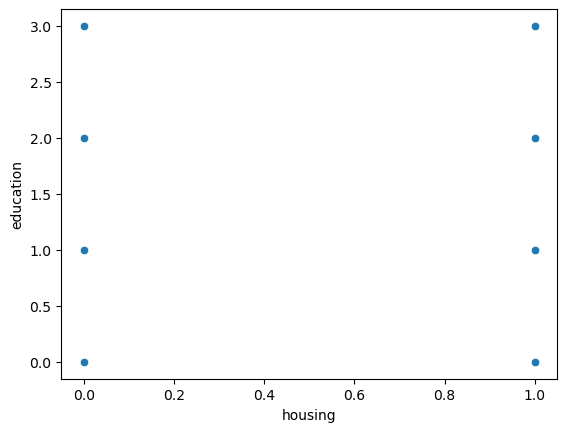

In [61]:
sns.scatterplot(x='housing',y='education',data=df1)

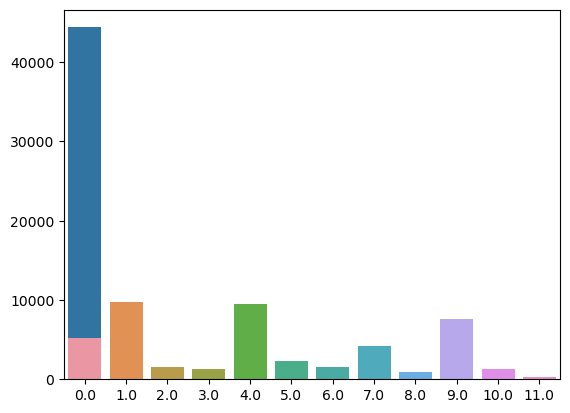

In [68]:
import seaborn as sns

# Assuming 'default' and 'job' are columns in df1

# Calculate the value counts for 'default' and 'job'
de = df1['default'].value_counts()
je = df1['job'].value_counts()

# Create the bar plot
sns.barplot(x=de.index, y=de.values)
sns.barplot(x=je.index, y=je.values)

# Display the plot
plt.show()


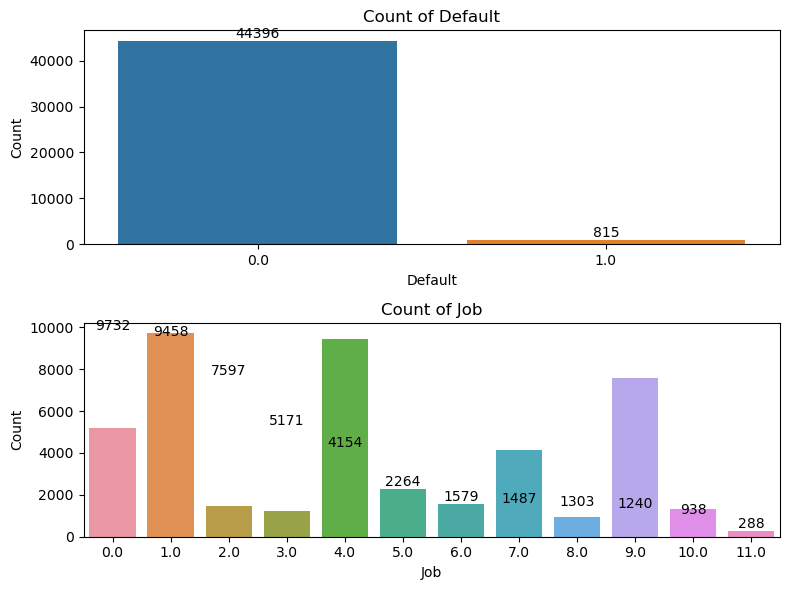

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'default' and 'job' are columns in df1

# Calculate the value counts for 'default' and 'job'
de = df1['default'].value_counts()
je = df1['job'].value_counts()

# Create the bar plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

sns.barplot(x=de.index, y=de.values, ax=ax[0])
sns.barplot(x=je.index, y=je.values, ax=ax[1])

# Add data labels on top of each bar
for i, v in enumerate(de.values):
    ax[0].text(i, v, str(v), ha='center', va='bottom')

for i, v in enumerate(je.values):
    ax[1].text(i, v, str(v), ha='center', va='bottom')

# Set the labels and titles
ax[0].set_xlabel('Default')
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Default')

ax[1].set_xlabel('Job')
ax[1].set_ylabel('Count')
ax[1].set_title('Count of Job')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


In [71]:
df1['job'].

0         4.0
1         9.0
2         2.0
3         1.0
4        11.0
         ... 
45206     9.0
45207     5.0
45208     5.0
45209     1.0
45210     2.0
Name: job, Length: 45211, dtype: float64